# __Zomato Bangalore EDA(Exploratory Data Analysis) project__

In [3]:
import os
from pathlib import Path

# get project root folder automatically
ROOT = Path().resolve().parent
DATA_PATH = ROOT / "data" / "raw" / "zomato.csv"

print("Project Root:", ROOT)
print("Dataset Path:", DATA_PATH)

Project Root: C:\Zomato-bangalore-EDA
Dataset Path: C:\Zomato-bangalore-EDA\data\raw\zomato.csv


## 1. Data Loading 

In [4]:
import pandas as pd

df = pd.read_csv(DATA_PATH, encoding="latin-1")
#df.head()

df.shape
df.columns
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   url                          51717 non-null  str  
 1   address                      51717 non-null  str  
 2   name                         51717 non-null  str  
 3   online_order                 51717 non-null  str  
 4   book_table                   51717 non-null  str  
 5   rate                         43942 non-null  str  
 6   votes                        51717 non-null  int64
 7   phone                        50509 non-null  str  
 8   location                     51696 non-null  str  
 9   rest_type                    51490 non-null  str  
 10  dish_liked                   23639 non-null  str  
 11  cuisines                     51672 non-null  str  
 12  approx_cost(for two people)  51371 non-null  str  
 13  reviews_list                 51717 non-null  str  
 14  m

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
#Inpect rate column
df['rate'].unique()[:20]

<StringArray>
['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
 '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5', '4.3/5',   'NEW',
 '2.9/5', '3.5/5',     nan, '2.6/5']
Length: 20, dtype: str

## 2. Data Cleaning

In [5]:
#Cleaning the rate column

def clean_rate(value):
    if pd.isna(value):
        return None
    value=str(value).strip()
    if value in ['NEW', '-']:
        return None
    return float(value.split('/')[0])

df['rating'] = df['rate'].apply(clean_rate)

In [6]:
df[['rate','rating']].head(15)
df['rating'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rating, dtype: float64

In [7]:
#Removing original column
df.drop(columns=['rate'], inplace=True)

In [9]:
# Cleaning the approx_cost(for two people) 

df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .str.replace(',', '')
)

df['cost_for_two'] = pd.to_numeric(
    df['approx_cost(for two people)'],
    errors='coerce'
)

df.drop(columns=['approx_cost(for two people)'], inplace=True)

In [10]:
df['cost_for_two'].describe()

count    51371.000000
mean       555.431566
std        438.850728
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: cost_for_two, dtype: float64

In [11]:
# Cleaning online_order and book_table
df['online_order'] = df['online_order'].map({'Yes':1, 'No':0})
df['book_table'] = df['book_table'].map({'Yes':1, 'No':0})

In [12]:
df = df.dropna(subset=['location', 'cuisines'])

## Drop Unnecessary Columns

In [13]:
df.drop(columns=[
    'url',
    'address',
    'phone',
    'reviews_list',
    'menu_item',
    'dish_liked'
], inplace=True)

### Core business question
### Do expensive restaurants have higher ratings?

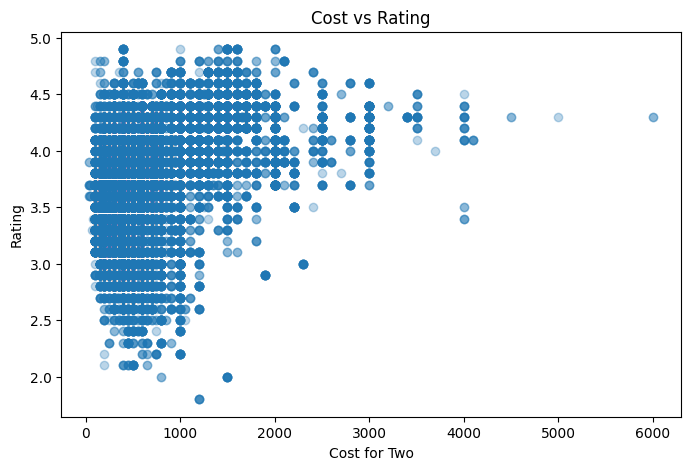

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['cost_for_two'], df['rating'], alpha=0.3)
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.title("Cost vs Rating")
plt.show()

In [30]:
df[['cost_for_two','rating']].corr()

,cost_for_two,rating
cost_for_two,1.000000,0.385156
rating,0.385156,1.000000


In [26]:
def clean_rate(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    if value in ['NEW', '-']:
        return None
    return float(value.split('/')[0])

df['rating'] = df['rate'].apply(clean_rate)

In [27]:
df[['rate', 'rating']].head()

,rate,rating
0,4.1/5,4.1
1,4.1/5,4.1
2,3.8/5,3.8
3,3.7/5,3.7
4,3.8/5,3.8


In [31]:
def cost_category(x):
    if pd.isna(x):
        return "Unknown"
    elif x <= 500:
        return "Budget"
    elif x <= 1500:
        return "Mid-Range"
    else:
        return "Premium"

df['cost_category'] = df['cost_for_two'].apply(cost_category)

df.groupby('cost_category')['rating'].mean()

cost_category
Budget       3.582519
Mid-Range    3.839315
Premium      4.156695
Unknown      3.717213
Name: rating, dtype: float64

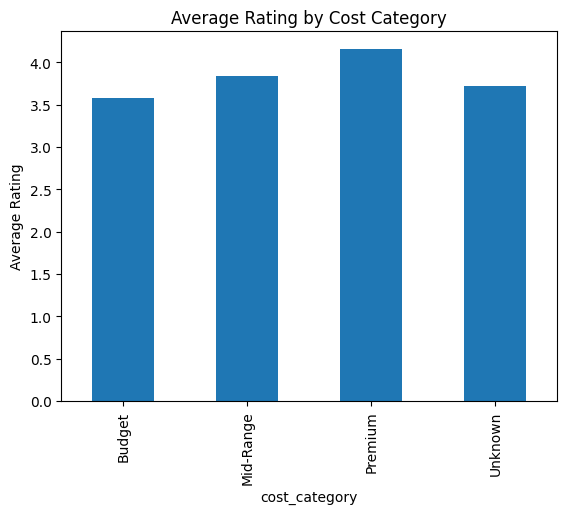

In [32]:
import matplotlib.pyplot as plt

df.groupby('cost_category')['rating'].mean().plot(kind='bar')
plt.title("Average Rating by Cost Category")
plt.ylabel("Average Rating")
plt.show()

### Do restaurants with table booking have higher ratings?

In [33]:
df.groupby('book_table')['rating'].mean()

book_table
0    3.621511
1    4.143464
Name: rating, dtype: float64

In [34]:
## Checking cost difference
df.groupby('book_table')['cost_for_two'].mean()

book_table
0     452.695254
1    1271.344394
Name: cost_for_two, dtype: float64

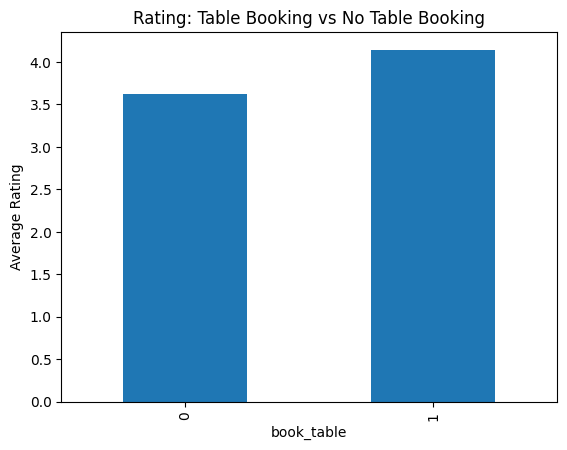

In [35]:
df.groupby('book_table')['rating'].mean().plot(kind='bar')
plt.title("Rating: Table Booking vs No Table Booking")
plt.ylabel("Average Rating")
plt.show()

In [37]:
df.groupby('online_order')['rating'].mean()

online_order
0    3.659069
1    3.722527
Name: rating, dtype: float64

## Calculate Average rating per location 

In [38]:
top_locations = (
    df.groupby('location')['rating']
      .mean()
      .sort_values(ascending=False)
)

top_locations.head(10)

location
Lavelle Road             4.142505
Koramangala 3rd Block    4.020419
St. Marks Road           4.017201
Koramangala 5th Block    4.005821
Church Street            3.992125
Sankey Road              3.965385
Koramangala 4th Block    3.918668
Cunningham Road          3.901053
Residency Road           3.863636
MG Road                  3.855857
Name: rating, dtype: float64

## Adding reliability Filter

In [39]:
location_stats = (
    df.groupby('location')
      .agg(
          avg_rating=('rating','mean'),
          restaurant_count=('rating','count')
      )
)

# Filter locations with minimum 30 rated restaurants
filtered_locations = location_stats[location_stats['restaurant_count'] >= 30]

top_locations = filtered_locations.sort_values(by='avg_rating', ascending=False)

top_locations.head(10)

,avg_rating,restaurant_count
location,,
Lavelle Road,4.142505,487
Koramangala 3rd Block,4.020419,191
St. Marks Road,4.017201,343
Koramangala 5th Block,4.005821,2319
Church Street,3.992125,546
Koramangala 4th Block,3.918668,841
Cunningham Road,3.901053,475
Residency Road,3.863636,605
MG Road,3.855857,811


## Visualizing Top 10 Locations

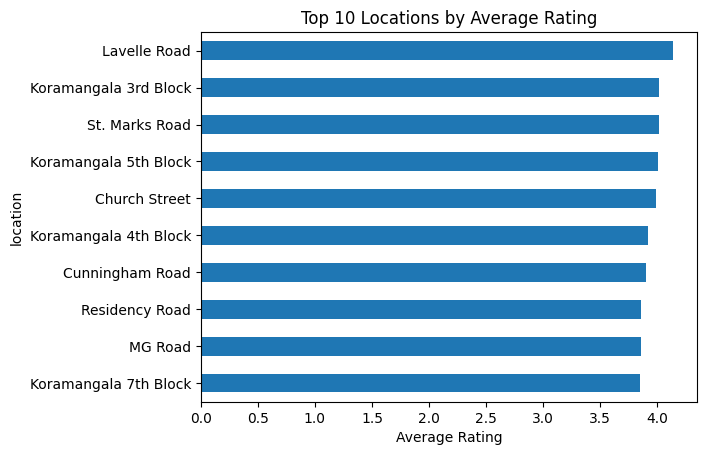

In [40]:
import matplotlib.pyplot as plt

top_locations.head(10)['avg_rating'].plot(kind='barh')
plt.title("Top 10 Locations by Average Rating")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()

In [14]:
## Export Cleaned Data
from pathlib import Path

# Define processed folder path
PROJECT_ROOT = Path().resolve().parent
processed_path = PROJECT_ROOT / "data" / "processed"

# Create folder if it doesn't exist
processed_path.mkdir(parents=True, exist_ok=True)

# Save cleaned dataframe
df.to_csv(processed_path / "zomato_cleaned.csv", index=False)

print("Processed dataset saved successfully.")

Processed dataset saved successfully.


***

## __Business Insights & Strategic Conclusions__

<div class="alert alert-block alert-success">
<b> 1. Overall Market rating Behavior:</b> The average restaurant rating in Bangalore is 3.7, with most establishments clustered between 3.4 and 4.0. This indicates a competitive but moderately satisfied market, with limited extreme underperformance.
</div>

<div class="alert alert-block alert-success">
<b>2. Pricing vs Customer Satisfaction:</b> A moderate positive correlation (0.38) exists between cost and rating.

- Budget Restaurants (₹ ≤ 500): Avg Rating = 3.58
- Mid-Range (₹ 500–1500): Avg Rating = 3.84
- Premium (₹ 1500+): Avg Rating = 4.16

Insight:
Higher-priced restaurants tend to deliver better customer experiences, but cost alone does not guarantee superior ratings.
</div>

<div class="alert alert-block alert-success">
<b>3. Impact of Service Experience (Table Booking):</b> Restaurants offering table booking show significantly higher satisfaction:

- Without Table Booking: 3.62
- With Table Booking: 4.14
Additionally, table-booking restaurants have nearly 3x higher average cost, reinforcing the premium positioning.

Insight:
Structured dining experience and service quality have a strong impact on customer satisfaction.
</div>

<div class="alert alert-block alert-success">
<b>4. Convenience vs Experience (Online Ordering):</b> Online ordering has minimal influence on ratings:

- Without Online Ordering: 3.66
- With Online Ordering: 3.72

Insight:
Convenience features contribute marginally to customer satisfaction compared to experiential factors such as ambience and service quality.
</div>

<div class="alert alert-block alert-success">
<b>5. Geographic Performance Analysis:</b> Top-performing locations include:

- Lavelle Road (Avg Rating: 4.14)
- Koramangala 3rd Block (Avg Rating: 4.02)
- St. Marks Road (Avg Rating: 4.02)

### These areas are premium commercial and nightlife hubs.
Insight:
Central upscale zones consistently host higher-rated restaurants, suggesting that location prestige and target demographic influence customer satisfaction.
</div>

<div class="alert alert-block alert-success">
<b>6. Strategic Conclusion:</b> - Customer satisfaction in Bangalore’s restaurant industry is primarily driven by:

- Premium positioning
- Structured dining experience
- Service quality
- Ambience and location advantage

Convenience features such as online ordering play a secondary role.

</div>

***

# __Executive Summary__

### Restaurants that invest in experience-driven value (ambience, table booking, premium service structure) consistently outperform budget establishments in customer ratings.

### For restaurant owners and investors, focusing on quality of service and premium dining positioning appears more impactful than purely offering convenience features.